# Dog Breed Classification 🐶

Multi-class image classification of  dog breeds using TensorFlow 2.0. and TensorFlow Hub.


## 1. Problem
Identify the breed of a dog from the given image.

## 2. Data
Data source: https://www.kaggle.com/c/dog-breed-identification/overview/description
## 3. Evaluation
For each image in the test set, you must predict a probability for each of the different breeds.


Source: https://www.kaggle.com/c/dog-breed-identification/overview/evaluation
## 4. Features
* Unstructured data.
* There are 120 breeds of dogs in the data set.
* 10,000+ images included in the training set.
* 10,000+ images included in the test set.

**Unzip the data.**

In [137]:
# !unzip "/content/drive/MyDrive/Dog-Breed-Classification/dog-breed-identification.zip" -d "/content/drive/MyDrive/Dog-Breed-Classification/"

**Prepare Workspace**

✅  Import TensorFlow

✅  Import TensorFlow_Hub

✅  Set Runtime to use GPU

In [138]:
# Import TensorFlow
import tensorflow as tf
import tensorflow_hub as hub

**Accessing the Data**

In [139]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Overview of labels
dog_labels = pd.read_csv('/content/drive/MyDrive/Dog-Breed-Classification/labels.csv')

In [140]:
# Overview of overall Data
dog_labels.describe()

,id,breed
count,10222,10222
unique,10222,120
top,34e4e0e28728d8c98df1884eab8375c4,scottish_deerhound
freq,1,126


In [141]:
# Overview of first 5 data
dog_labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


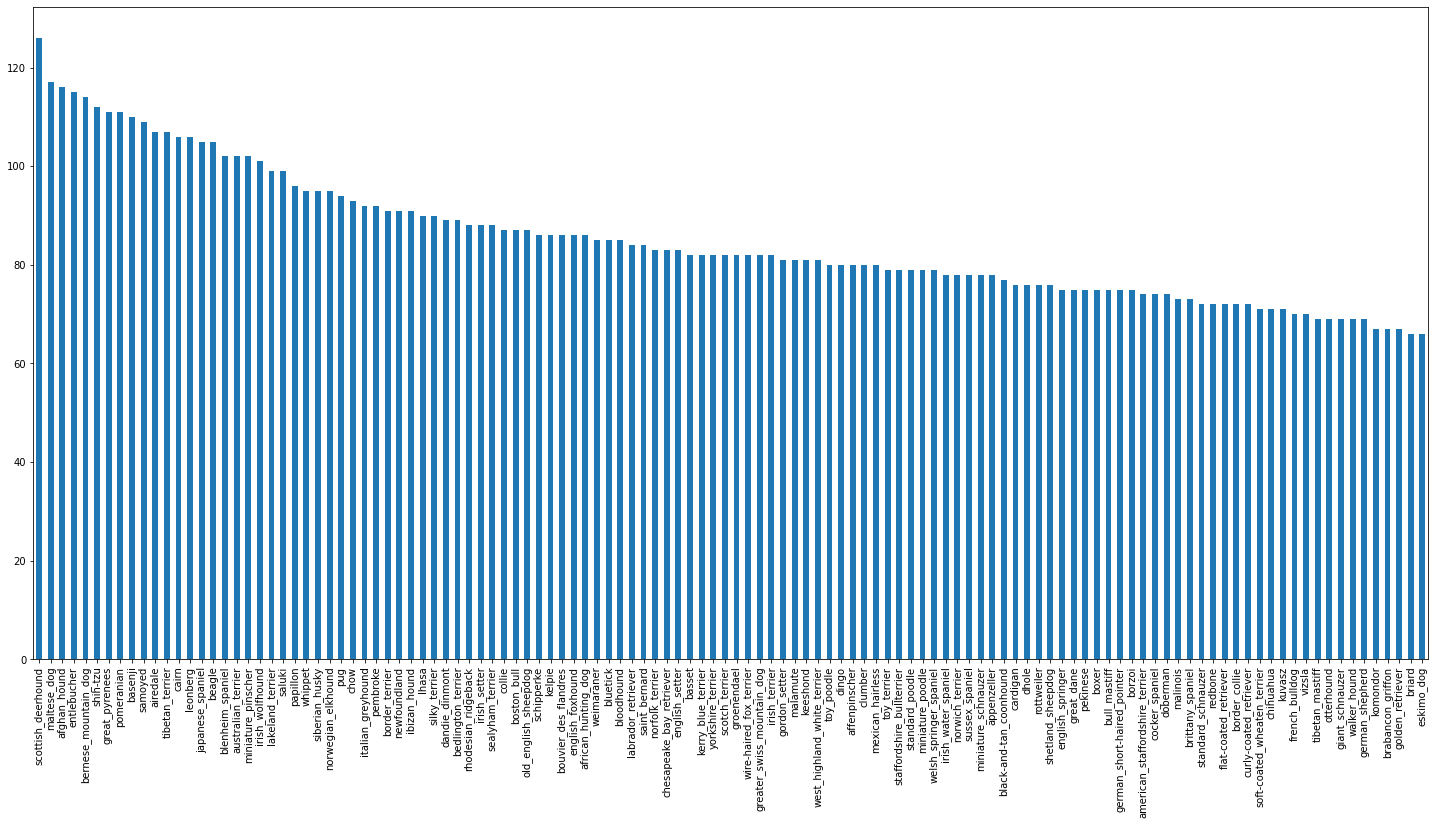

In [142]:
# How many images of each breed is available?
dog_labels["breed"].value_counts().plot.bar(figsize=(25, 12));

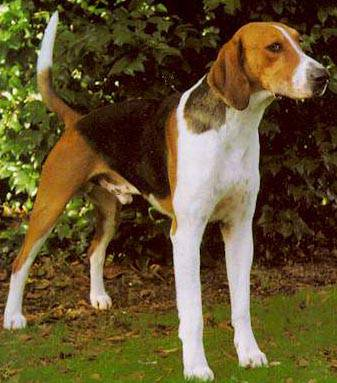

In [143]:
# View an image from the directory
from IPython.display import Image
Image("drive/My Drive/Dog-Breed-Classification/train/ffca1c97cea5fada05b8646998a5b788.jpg")

**Display image path names**

In [144]:
# Create path names from image ID's
train_img_path_names = ["drive/My Drive/Dog-Breed-Classification/train/" + fname + ".jpg" for fname in dog_labels['id']]

# Overview of first 10
train_img_path_names[:10]

['drive/My Drive/Dog-Breed-Classification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Dog-Breed-Classification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Dog-Breed-Classification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Dog-Breed-Classification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Dog-Breed-Classification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/Dog-Breed-Classification/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/Dog-Breed-Classification/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/Dog-Breed-Classification/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/Dog-Breed-Classification/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/Dog-Breed-Classification/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [145]:
# Compare number of path names to number of actual images.
import os

# Count of jpg files in the drive directory
print(f"Total JPG: {len(os.listdir('drive/My Drive/Dog-Breed-Classification/train/'))}")
# Count of path names
print(f"Total Path Names: {len(train_img_path_names)}")

Total JPG: 10222
Total Path Names: 10222


# Get the Data Ready

**Prepare the Labels**

In [146]:
# Import library
import numpy as np
dbreeds = dog_labels["breed"]

# Convert dbreeds to array
dbreeds = np.array(dbreeds)
# Check result
dbreeds

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [147]:
# List of unique labels
ubreeds = np.unique(dbreeds)
ubreeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [148]:
# Count unique breeds
len(ubreeds)

120

In [149]:
# Turn labels into array of booleans
boobreeds = [label == ubreeds for label in dbreeds]
boobreeds[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [150]:
# Count
len(boobreeds)

10222

In [151]:
# Convert boolean aarray into integer
boobreeds[0].astype(int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [152]:
#TODO Create validation set

**Prepare Validation Set**

In [153]:
# Setup X & y variables
X = train_img_path_names
y = boobreeds

In [154]:
len(train_img_path_names)

10222

In [155]:
len(boobreeds)

10222

In [156]:
# Set number of images to use for experimenting
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, step:1000}

In [157]:
# Import SciKit Learn
from  sklearn.model_selection import train_test_split

In [158]:
# Split into training and validation of total size NUM_IMAGES
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=9)

In [159]:
# Verify shape
len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [160]:
# Verify split data
X_train[:5], y_train[:5]

(['drive/My Drive/Dog-Breed-Classification/train/182c436dd1fbec1c5f4979077ce74659.jpg',
  'drive/My Drive/Dog-Breed-Classification/train/145f7bb3bf6e4877b8b6624f612a1c24.jpg',
  'drive/My Drive/Dog-Breed-Classification/train/0f91ba06bfea7401f59c6d796717029d.jpg',
  'drive/My Drive/Dog-Breed-Classification/train/02508e76981e1ba059d785704b4c480c.jpg',
  'drive/My Drive/Dog-Breed-Classification/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, Fals

**Preprocessing images(Turn images to Tensors)**

In [161]:
# Conver imaage to NumPy array
from matplotlib.pyplot import imread
image = imread(train_img_path_names[42])
image.shape

(257, 350, 3)

In [162]:
image.max(), image.min()

(255, 0)

In [163]:
tf.constant(image)

<tf.Tensor: shape=(257, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]],

       [[ 56, 104,  66],
        [ 58, 106,  66],
        [ 64, 112,  72],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 73, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  13],
        [  6,  15,  14],
        ...,
        [120, 113,  67],
        [126, 118,  72],
        [122, 114,  67]],

       [[  0,   4,   6],
        [  0,   9,   8],
        [  1,  10,   9],
        ...,
        [105,  98,  52],
        [111, 104,  58],
        [111, 103,  56]],

       [[ 18,  16,  37],
        [ 18,  18,  28],
        [ 17,  20,  11],
        ...,
        [101,  92,  5

In [164]:
# Define image size (Resize image to be a shape of (224,224))
IMG_SIZE = 224

# Create a function for preprocessing images
def process_image(image_path, img_size=IMG_SIZE):
  """
  Takes an image file path and turns the image into a Tensor.
  """
  # Read an image file
  image = tf.io.read_file(image_path)
  # Turn jpeg into numerical Tensor with 3 color channels (RGB)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert color channel values from 0-255 to 0-1 values (Normalization)
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize image to (224,224)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  # Return values
  return image

In [165]:
# Check Process image
(process_image(X[42]), tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

**Turn data into batches**

In [166]:
# Yann LeCun batch size concept (Batches of size 32)
# Create a function to return a tuple (image, label)
def get_image_label(image_path, label):
  """
  Takes an image file path name and the associated label,
  processes the 
  """
  image = process_image(image_path)
  return  image, label

In [167]:
# Defin batch size (Start with 32, default is 32)
BATCH_SIZE = 32

# Function to turn data into batches
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (X) and label (y) pairs.
  Shuffles the data if it's training data but does not shuffle if it's validation data.
  Also accepts test data as input (no labels).
  """
  # If the data is a test dataset, we probably do  not have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # File  paths only (No labels)
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch
  
  # If data is a valid data set, shuffling is not needed.
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # File Path
                                               tf.constant(y))) # Labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch
  
  else:
    print("Creating training data batches...")
    # Turn file paths and labels into tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    # Shuffling path names and labels before mapping image processor
    # function is faster than shuffling images
    # Reason : Goal is to minimize time between experiments
    data = data.shuffle(buffer_size=len(X))

    # Create (image, label) tupls (this also turns  the image path)
    # into a preprocessed  image
    data = data.map(get_image_label)

    # Turn the training data into batches
    data_batch = data.batch(BATCH_SIZE)
  
  return data_batch


In [168]:
# Create training and validation batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [169]:
# Check out the different attributes of the data batches
train_data.element_spec,val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

**Visualize Data Batches**

In [175]:
import matplotlib.pyplot as plt

# Create a function for viewing images and data batch
def show_20_images(images, labels):
  """
  Display a plot of 20 images and their labels from a data batch
  """
  # Setup the figure
  plt.figure(figsize=(15, 15))
  # Loop through 20
  for i in range(20):
    # Create subplots
    ax = plt.subplot(5,  5,  i+1)
    # Display an image
    plt.imshow(images[i])
    # Add  image label as title
    plt.title(ubreeds[labels[i].argmax()])

In [177]:
train_images,  train_labels = next(train_data.as_numpy_iterator())

In [178]:
len(train_images), len(train_labels)

(32, 32)

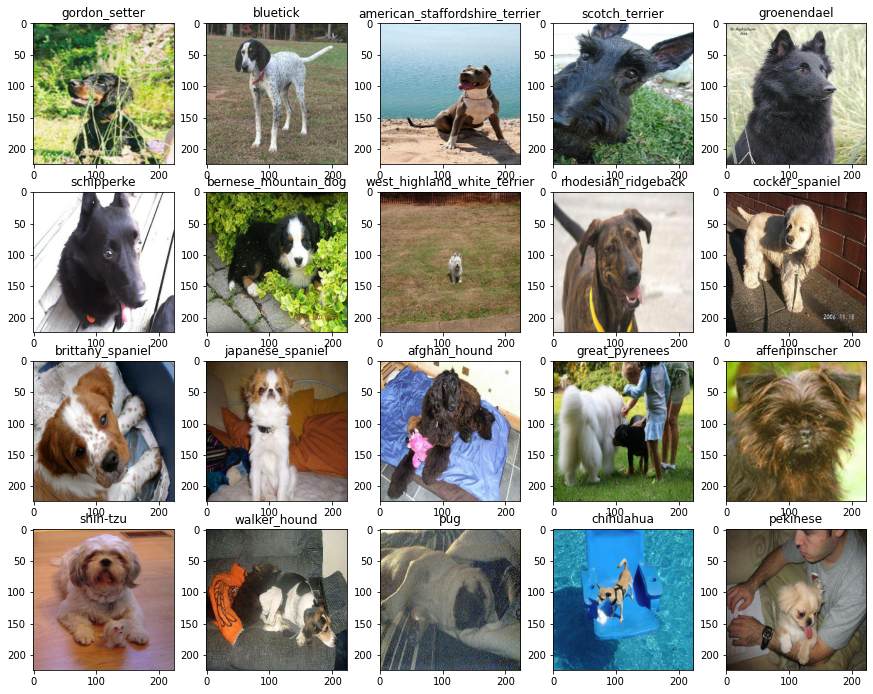

In [179]:
# Visualize Data in a training batch
show_20_images(train_images, train_labels)

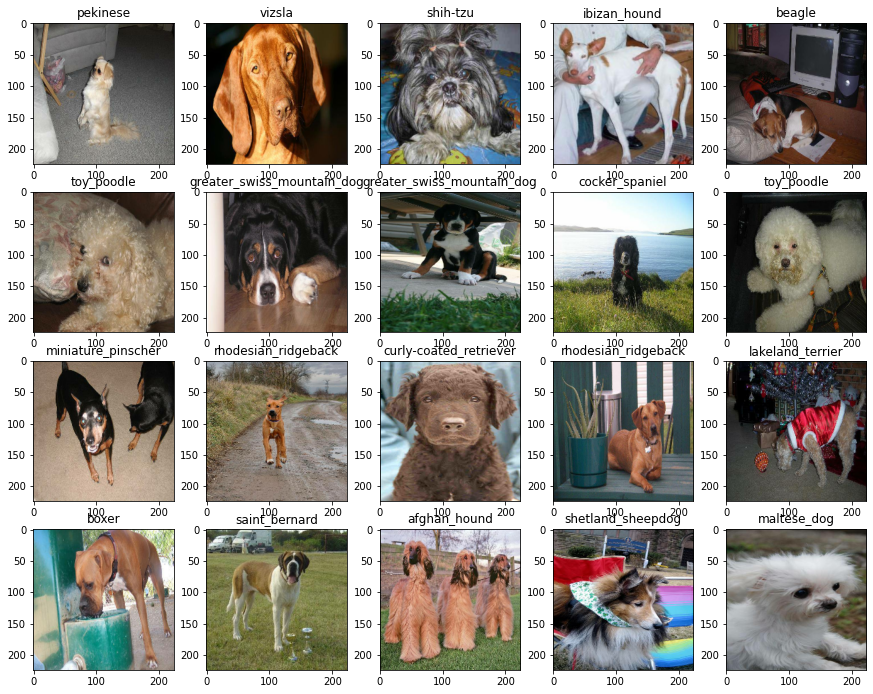

In [182]:
# Visualize validation set
val_images, val_labels = next(val_data.as_numpy_iterator())
show_20_images(val_images, val_labels)

# Building a Model

* Input shape (Image shape, in the form of Tensors) to the model.
* Output shape (Image labels, in the form of Tensors) of the model.
* The URL of the model





In [183]:
# Input shape of the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # Batch, heigh, width, color channels

# Output shape of the model
OUTPUT_SHAPE = len(ubreeds)

# Setup model URL from TensofFlow Hub (Library for reusable machine learning models)
# Transfer learning
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

In [185]:
# Use Tensorflow | Keras
# Create a Kerass model function
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with: ", MODEL_URL)

  # Setup model layers
  # Instantiate the model
  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), # Layer 1 (Input)
    tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                          activation="softmax") # Layer 2 (Output)
  ])

  # Compile the model
  model.compile(
      loss = tf.keras.losses.CategoricalCrossentropy(),
      optimizer = tf.keras.optimizers.Adam(),
      metrics = ["accuracy"]
  )

  # Build the model
  model.build(INPUT_SHAPE)

  return model

In [186]:
model = create_model()
model.summary()

Building model with:  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1001)              5432713   
_________________________________________________________________
dense (Dense)                (None, 120)               120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________
